In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
import io

In [ ]:
df = pd.read_csv('train.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#Descriptive Statistic

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
799,56,retired,married,secondary,no,0,yes,no,unknown,7,may,333,4,-1,0,unknown,no
3844,54,technician,divorced,secondary,no,0,yes,no,unknown,16,may,161,1,-1,0,unknown,no
28820,26,admin.,single,secondary,no,802,no,no,cellular,30,jan,77,1,2,2,other,no
9802,50,housemaid,married,secondary,no,1484,no,no,unknown,9,jun,213,1,-1,0,unknown,no
28378,37,admin.,single,secondary,no,328,no,no,cellular,29,jan,79,1,-1,0,unknown,no


Pada kolom `job` ada value ‘admin.’ yang mana seharusnya penulisan tidak perlu menggunakan tanda titik (.) seperti pekerjaan lainnya. Selebihnya, semua tipe data sudah sesuai.

In [ ]:
def segment(x):
    if x['y'] == 'yes':
        segment = 1
    else:
        segment = 0
    return segment

In [ ]:
df['y2'] = df.apply(lambda x: segment(x), axis= 1)
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y2
44162,31,technician,married,tertiary,no,2166,no,no,cellular,13,jul,577,6,182,2,success,yes,1
24227,47,management,married,tertiary,no,1028,no,yes,cellular,17,nov,55,1,-1,0,unknown,no,0
28190,32,services,single,secondary,no,486,no,no,cellular,29,jan,1181,1,-1,0,unknown,yes,1
32221,34,technician,single,secondary,no,486,yes,no,cellular,16,apr,204,1,328,2,failure,no,0
25840,33,blue-collar,married,tertiary,no,6138,yes,no,cellular,19,nov,384,1,183,1,failure,no,0
32551,51,blue-collar,married,unknown,no,296,no,no,cellular,17,apr,177,1,-1,0,unknown,no,0
16290,31,blue-collar,married,secondary,no,79,yes,yes,cellular,23,jul,235,11,-1,0,unknown,no,0
8524,32,admin.,married,secondary,no,277,yes,no,unknown,3,jun,231,12,-1,0,unknown,no,0
3948,50,blue-collar,married,primary,no,231,yes,no,unknown,16,may,171,4,-1,0,unknown,no,0
17807,35,management,married,tertiary,no,0,yes,no,telephone,29,jul,399,12,-1,0,unknown,no,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  y2         45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [ ]:
cats = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','y2']

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y2
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


- pada kolom `previous` nampak issue pada nilai maksimalnya, dimana salah satu customer dihubungi pada campaign sebelumnya sebanyak 275 kali. Kemungkinan akan di drop pada saat pre-processing.
- kolom `balance`, `duration`, dan `pdays` tampak right-skewed (median < mean).
- kolom `age`, `day`, dan `campaign` tampaknya memiliki distribusi yang cukup simetris (median dan mean tidak berbeda signifikan).


In [ ]:
df[cats].describe()

,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211
unique,3,4,2,2,2,3,12,4
top,married,secondary,no,yes,no,cellular,may,unknown
freq,27214,23202,44396,25130,37967,29285,13766,36959


- Data didominasi oleh customer yang sudah menikah (`marital`) dan/atau tidak memiliki piutang (`default`) ataupun pinjaman (`loan`).
- lebih dari 75% data customer tidak diketahui hasil/output dari campaign sebelumnya (`poutcome`).

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Banyak nasabah yang tidak melakukan deposito

In [ ]:
print("Data Variables Unique Values List:\n")
for column in df.columns:
    print(f"{column} :")
    print(df[column].unique(), "\n")

Data Variables Unique Values List:

age :
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88] 

job :
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

marital :
['married' 'single' 'divorced'] 

education :
['tertiary' 'secondary' 'unknown' 'primary'] 

default :
['no' 'yes'] 

balance :
[ 2143    29     2 ...  8205 14204 16353] 

housing :
['yes' 'no'] 

loan :
['no' 'yes'] 

contact :
['unknown' 'cellular' 'telephone'] 

day :
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31] 

month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

duration :
[ 261  151   76 ... 1298 1246 1556] 

campaign :
[ 1  2  3  5  4  6  7  8  9 10 11 12 1

# Univariate Analysis

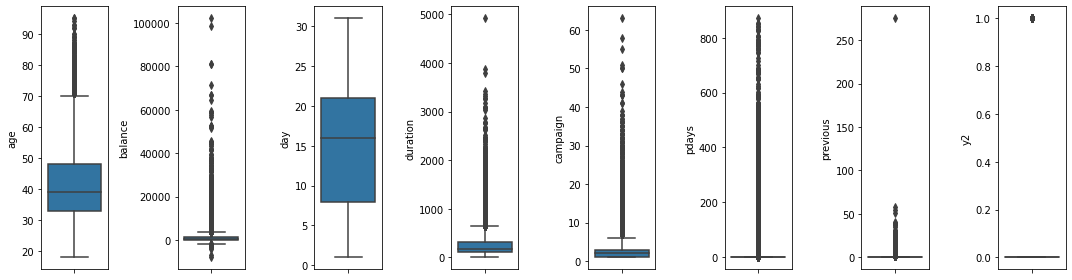

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y=df[nums[i]], orient='v')
  plt.tight_layout()

* Outlier terlihat pada kolom `previous` dan `duration`
* Terdapat distribusi yang cukup skewed pada `duration`, `campaign`, `balance`

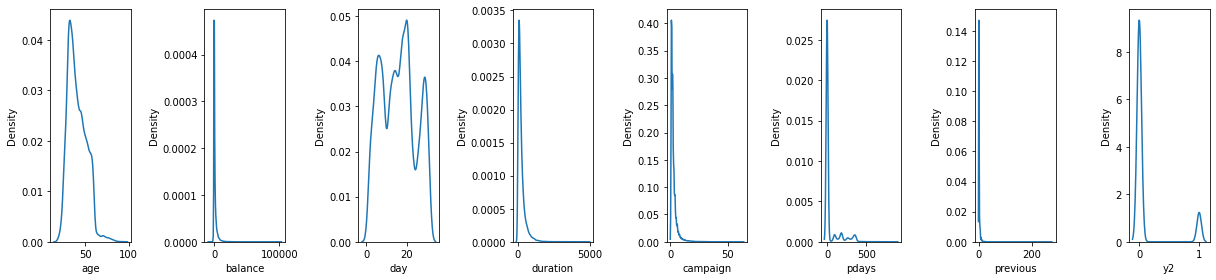

In [ ]:
plt.figure(figsize=(17, 4))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.kdeplot(x=df[nums[i]])
  plt.tight_layout()

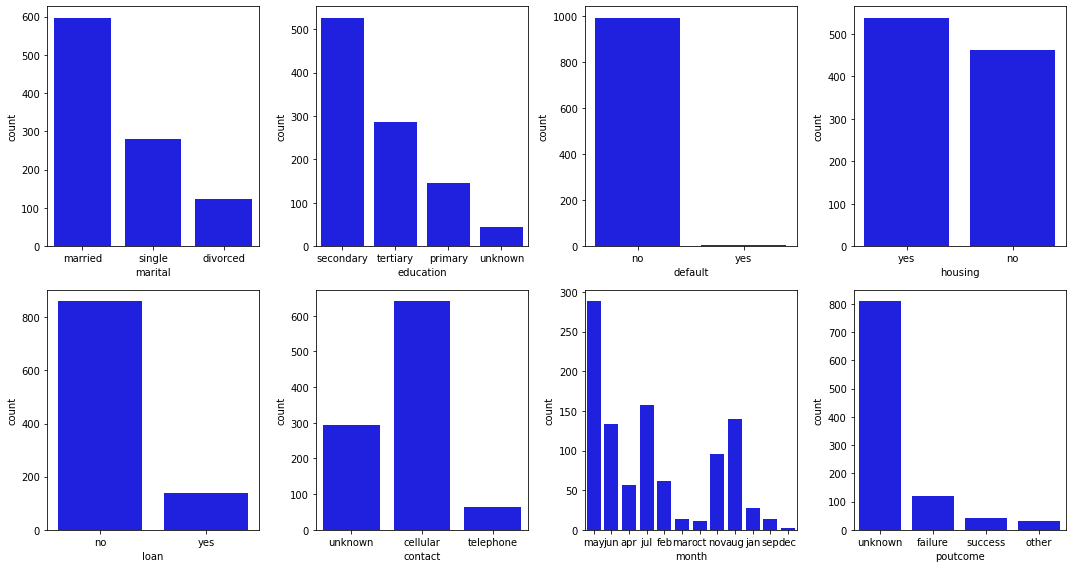

In [ ]:
cat_sample = df.sample(1000, random_state=42)
plt.figure(figsize=(15, 8))
for i in range(0, len(cats)):
  plt.subplot(2, len(cats)/2, i+1)
  sns.countplot(x=cat_sample[cats[i]], color = 'blue')
  plt.tight_layout()

# Multivariate Analysis

In [ ]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,y2
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y2,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


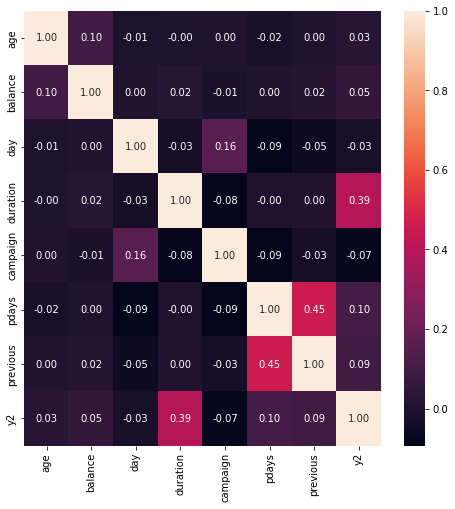

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat disimpulkan bahwa:
* `y2` memiliki potensi korelasi yang tinggi dengan `duration` (strong potential correlation)
* `y2` juga memiliki korelasi yang lemah dengan `previous` dan `pdays` (decent potential feature)
* Target kita `campaign` memiliki korelasi positif dengan `day` 
* Sedangkan korelasi `campaign` dengan `age` sangat lemah, kemungkinan bukan fitur yang potensial
* ada korelasi antar `previous` dengan `pdays`, namun tidak cukup kuat untuk dikatakan redundant

<Figure size 576x576 with 0 Axes>

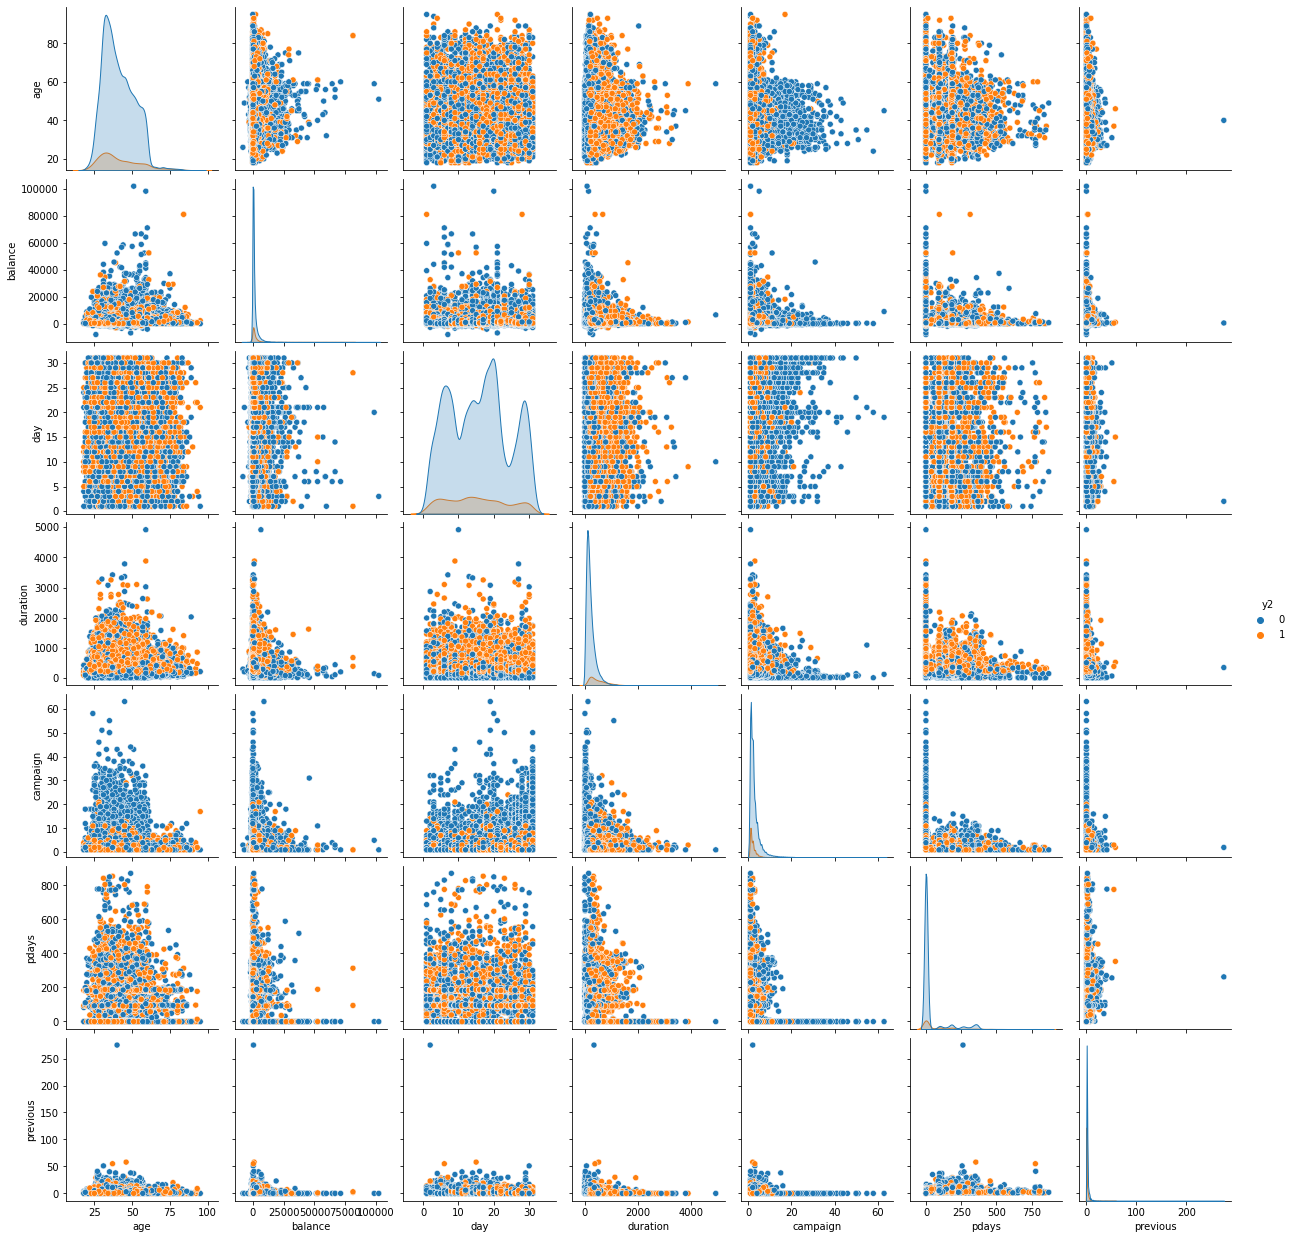

In [ ]:
plt.figure(figsize=(8, 8))
sns.pairplot(df, diag_kind='kde', hue='y2')

Dari pair plot di atas, dapat disimpulkan hal yang serupa bahwa:
* belum ada yang memiliki korelasi linier


In [ ]:
cats

['marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


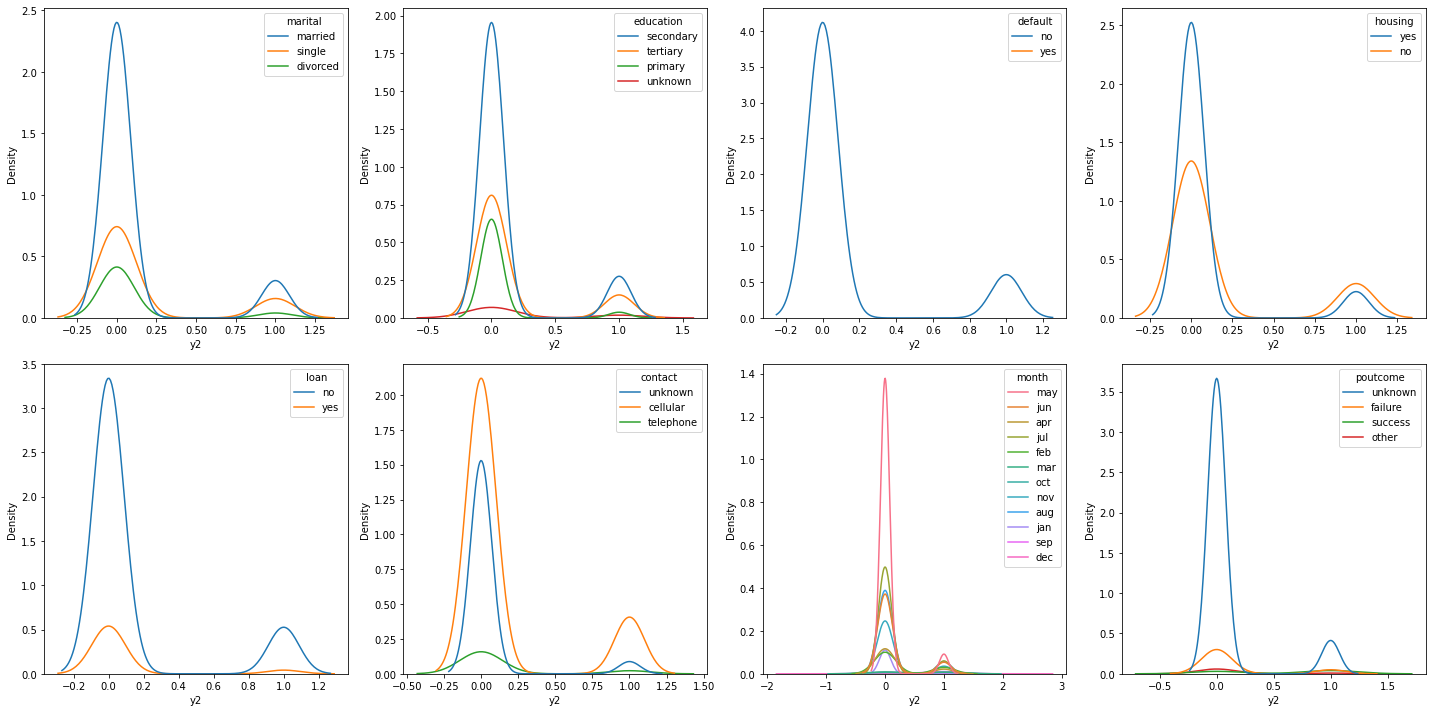

In [ ]:
features = cats
plt.figure(figsize=(20, 10))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1) 
    sns.kdeplot(data=cat_sample, x='y2', hue=features[i])
    plt.tight_layout()

- Setiap fiture memiliki puncak distribusi dengan nilai axis x yang hampir sama

## EDA Conclusion
Dapat disimpulkan bahwa:
* Data terlihat valid dan tidak ada kecacatan yang signifikan
* Ada beberapa distribusi yang sedikit *skewed*
* Ada *feature* yang memiliki korelasi dengan *target*
* Ada beberapa *feature* yang terlihat sama sekali tidak berkorelasi